# LogisticRegression (Regressão Logística)

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica (target), frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias (Wikipedia).

O objetivo é construir a reta que melhor divide o conjunto de dados de maneira correta.

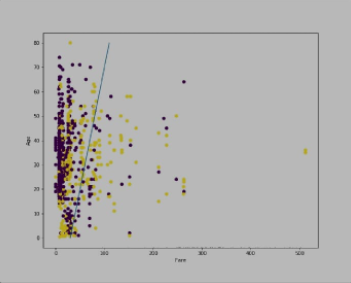

O modelo transforma o resultado de uma regressão linear (a partir das variáveis explicativas) log-linear utilizando a função sigmóide (que enquadra todos os valores obtidos entre 0 e 1). Sendo assim, os coeficientes da regressão representam o aumento marginal na probabilidade de que Y = 1. 

* **Equação da Regressão Logística:**
$$log(\frac{p}{1-p}) = \beta_{0} + \beta X$$

onde p / (1-p) = razão de probabilidade (odd) -> proporção entre a probabilidade de sucesso e a probabilidade de falha;

e cada beta representa a variação percentual aproximada no valor do logaritmo da odd dada uma variação em seu elemento X associado em uma unidade.

* **Obtenção da Probabilidade:**
$$p = \frac{e^{\beta_{0}+ \beta X}}{1+e^{\beta_{0} + \beta X}}$$


Gráfico da Regressão Logística:
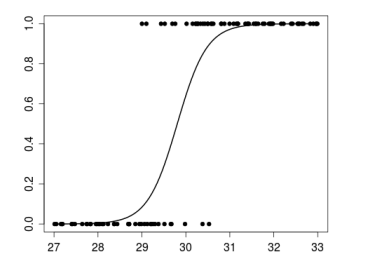

Pressupostos iniciais para se obter uma boa regressão:

* Existência de relação linear entre x e y (correlação positiva)
* Ausência de correlação entre as variáveis explicativas (Multicolinearidade) (X's)
* Ausência de heterocedasticidade
* Resíduos apresentam média zero (não necessariamente seguem uma distribuição normal)

Prós:
* Pouco gasto computacional
* Interpretabilidade

Contras:
* Vulnerável ao overfitting
* Baixa capacidade de generalização (abordagem de problemas complexos)

### Ajuste de uma Regressão Logística

Ainda que o modelo aparente ser uma regressão linear simples (cujos métodos de estimação são amplamente conhecidos e simples), existem várias formas de se estimar quais os valores dos coeficientes (betas) que garantem o melhor ajuste do modelo ao conjunto de dados analisado.

##### Estimação por Máxima Verossimilhança

A forma mais comum é selecionar o modelo que maximiza a **função de verossimilhança**. Ela estabelece uma recompensa com base em cada valor previsto por ele (valor da verossimilhança) e retorna um *score* final para cada tipo de modelo estimado, que é obtido a partir do produto entre os valores das verossimilhanças por cada acerto/erro.

Vale ressaltar que esse score penaliza as previsões com base na distância entre o valor previsto e o real, como mostra a fórmula a seguir. 

Na imagem abaixo: sendo `p` a probabilidade prevista de que Y = 1, a função retornará um valor `p` caso Y realmente seja 1 e `1-p` caso Y seja 0, penalizando a distância entre o valor previsto e o valor real.

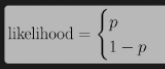

# Construindo o Algoritmo

### Importação das Bibliotecas e Manipulação dos Dados

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Manipular dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../dados/titanic.csv")
df.drop(["PassengerId", "Name", "SibSp", "Ticket", "Cabin", "Embarked", "Parch"], axis = 1, inplace = True)
df["Sex"] = np.where(df["Sex"] == "male", 1, 0)
df.dropna(inplace = True)
df.head() # Alvo Binário: Survived

X = df.drop("Survived", axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


### Ajuste do Modelo

In [4]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [26]:
# Probabilidades (lista contendo [P(X), P(Y)])
print(modelo.predict_proba(X_train))

[[0.05940951 0.94059049]
 [0.35256571 0.64743429]
 [0.94222508 0.05777492]
 ...
 [0.91513703 0.08486297]
 [0.90360418 0.09639582]
 [0.03881785 0.96118215]]


### Gráfico de uma Regressão Univariada

ATENÇÃO: Essa NÃO é a regressão estimada pelo modelo. A função geradora do gráfico por si só estima uma regressão entre duas variáveis (X e Y) e plota os resultados. Isso foi incluído pois pode ser útil.

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

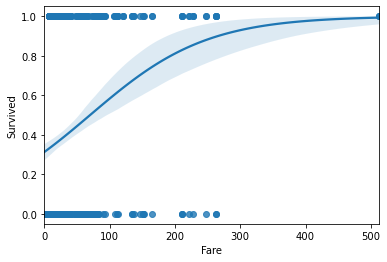

In [34]:
sns.regplot(x = X_train["Fare"], y = y_train, logistic = True)

### Métricas de Avaliação

In [6]:
# Acurácia
print(accuracy_score(y_test, y_pred))

0.8358778625954199


In [7]:
# Matriz de Confusão
print(confusion_matrix(y_test, y_pred))

[[140  22]
 [ 21  79]]


In [8]:
# Métricas de Avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       162
           1       0.78      0.79      0.79       100

    accuracy                           0.84       262
   macro avg       0.83      0.83      0.83       262
weighted avg       0.84      0.84      0.84       262



In [22]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

AUC - Teste : 0.8270987654320989


### Otimização

O resultado da previsão a partir do modelo logístico é a probabilidade de ocorrência de um resultado positivo na variável dependente, que pode ser interpretado de diferentes maneiras com base no problema. O padrão estabelecido é um ponto de corte (threshold) de 50%, ou seja, assumimos que Y=1 irá ocorrer a partir do momento em que sua probabilidade de ocorrência for maior do que 50%.

Este hiperparâmetro pode ser otimizado conforme estamos dispostos a aceitar uma maior proporção de previsões corretas para um resultado (0 ou 1), em detrimento de uma maior proporção de previsões erradas da outra variável. Isso significa maximizar a precisão em detrimento do recall, ou vice-versa.

Em uma regressão logística, a curva ROC pode ser calculada a partir de um mesmo modelo estimando-se a True Positive Rate e a False Positive Rate para cada threshold, e pode servir para representar de outra forma esta relação de trade-off. O threshold ideal a ser escolhido deve estar o mais próximo possível do canto superior esquerdo do gráfico.

Existem diversas formas de encontrar um threshold ótimo que maximize essa relação. São elas:

A) O modelo com o ponto de corte ótimo deve apresentar a maior média geométrica entre sensibilidade e especificidade.

   * Sensibilidade: é o recall da classe positiva (TP Rate), ou seja, TP / (TP + FN) -> taxa de acerto das previsões, quando o alvo é positivo
   * Especificidade: é o recall da classe negativa (TN Rate ou 1 - FP Rate), ou seja, TN / (TN + FP) -> taxa de acerto das previsões, quando o alvo é negativo

* Cálculo: Média Geométrica = (sensibilidade * especificidade)^(1/2)

B) O modelo com o ponto de corte ótimo deve apresentar o maior valor para a estatística J de Youden.

* Cálculo: J = sensibilidade + especificidade - 1 => J = TPR - FPR

C) O modelo com o ponto de corte ótimo deve apresentar o maior valor para o F1-Score, que é a média harmônica entre precisão e recall, a fim de maximizá-los ao mesmo tempo. 

* Cálculo: F1 = 2 * (precisão * recall) / (precisão + recall)

**Obs.:** O método `modelo.predict_proba(X_test)` é interessante pois retorna somente as probabilidades previstas de que Y=1 no conjunto de teste. Com ele podemos alterar o threshold na mão, criando outro array com os valores previstos dada uma threshold diferente de 50%.

### Exemplo de Otimização com a estatística-J

In [89]:
i = np.arange(len(tpr))
df_thresholds = pd.DataFrame({'fpr' : pd.Series(fpr, index = i),
                          'tpr' : pd.Series(tpr, index = i), # sensibilidade
                          '1-fpr' : pd.Series(1-fpr, index = i), # especificidade
                          'J' : pd.Series(tpr + (1 - fpr) - 1, index = i), # sensibilidade + especificidade -1
                          'threshold' : pd.Series(thresholds, index = i)}) # thresholds testados

df_thresholds = df_thresholds.sort_values(by = "J", ascending = False)
corte = df_thresholds.iloc[0]["J"]
print("O threshold ótimo é de: ", round(corte, 3))

O threshold ótimo é de:  0.709


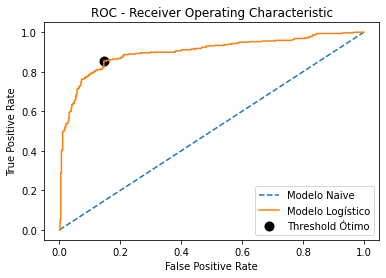

In [92]:
# Criando Curva ROC
y_pred_proba = modelo.predict_proba(X_train)[::,1] # Probabilidade de Y = 1 
fpr, tpr, thresholds = roc_curve(y_train,  y_pred_proba)

plt.scatter(df_thresholds.iloc[0]["fpr"], df_thresholds.iloc[0]["tpr"], marker = 'o', color='black', label='Threshold Ótimo', linewidth = 4)
plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Modelo Logístico')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()